In [1]:
import numpy as np
import time
from lmdec import PowerMethod
from lmdec.examples import get_ex1
import matplotlib.pyplot as plt

Find Rank k Singular Value Decomposition (SVD) of an array

In [2]:
A = np.random.randint(0, 3, size=(200,100), dtype='uint8')
U, S, V = np.linalg.svd(A, full_matrices=False)

How accurate is the numpy linear algebra decomposition of A?

$$|| USV - A ||_1 $$

In [3]:
print(np.mean(np.abs(U.dot(np.diag(S).dot(V)) - A)))

2.038512188328492e-15


What if $A$ is much larger?

Well, since `np.linalg.svd` looks for an extremely accurate answer it is quite slow. For a large matrix, it will take a long time. For this example we use a 20000 by 8000 matrix, $A$. The SVD was pre computed, but can be tested by setting `test_it` to `True`.

In [4]:
A, Uk, Sk, Vk = get_ex1()
k = 10

In [5]:
test_it = False
if test_it:
    start = time.time()
    U, S, V = np.linalg.svd(A, full_matrices=False)
    Uk, Sk, Vk = U[:, :k], S[:k], V[:k, :]
    print('It took: {0:.2f} s'.format(time.time() - start))
    
def eigen_vector_value_test(array, u, s, v):
    """Computes quality of SVD decomposition of array
    
    array == u*s*v (v is pre transposed)
    array*v' == u*s
    array*v' - u*s == 0
    """
    return np.linalg.norm(array.dot(v.T) - u.dot(np.diag(s)), 2)

Since we are only focusing on a truncated SVD we will focus on the top 10 vectors.

In [6]:
eigen_vector_value_test(A, Uk, Sk, Vk)

2.303767705481594e-12

However, if we only need a low rank solution we can utilize an algorithm that scales better.

In [10]:
PM1 = PowerMethod(k=k, scale=False, center=False, factor=None)
U1, S1, V1 = PM1.svd(A)

How accurate is this solution? Not very!

In [11]:
print(f"Preformed {PM1.num_iter} iterations")
print("Took {0:.2f} seconds".format(PM1.time))

Preformed 4 iteartions
Took 3.72 seconds


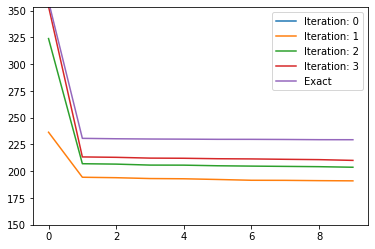

In [15]:
for i, temp_S in enumerate(PM1.history['iter']['S']):
    plt.plot(temp_S, label=f'Iteration: {i}')
plt.plot(Sk, label='Exact')
plt.ylim(150, 353)
plt.legend()
plt.show()

# How to find a higher accuracy solution?

PowerMethod has many tunable parameters, but the main one to worry about is `tol` which represents the desired tolerance. 

In addition, we may need to give the algorithm more time or more iterations with `time_limit` or `max_iter` respectively. For a more detailed guide see the UsageGuide.

In [16]:
PM2 = PowerMethod(k=k, tol=1e-5, scale=False, center=False,
                  factor=None, max_iter=150, time_limit=300)

In [17]:
U2, S2, V2 = PM2.svd(A)

In [18]:
print(f"Preformed {PM2.num_iter} iterations")
print("Took {0:.2f} seconds".format(PM2.time))

Preformed 122 iteartions
Took 60.86 seconds


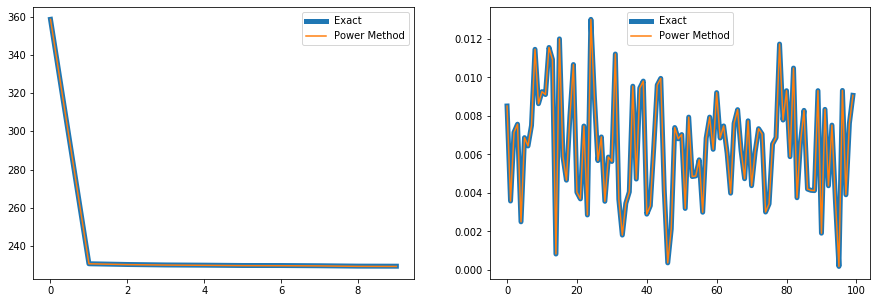

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(15)
# Plot the singular Values
ax1.plot(Sk, label='Exact', linewidth=5)
ax1.plot(S2, label='Power Method')
# Plot the singular vectors
ax2.plot(np.abs(Uk[:100, 0]), label='Exact', linewidth=5)
ax2.plot(np.abs(U2[:100, 0]), label='Power Method')
# np.abs as -v and v are both valid singular vectors
ax1.legend()
ax2.legend()
plt.show()

# How to set these parameters?
Often times it is unknown know how many iterations are need, or how long each iteration will take, or how accurate of a solution is needed.

Therefore, it can be convenient to set the tolerance very low and running the algorithm for an arbitrary amount of time and triggering a `KeyboardInterrupt`. Then the most accurate solution will be stored under `last_value` and will be returned.

In [35]:
extreme_tolerance = 1e-16
lots_of_iterations = 100000
a_full_day = 24*60*60
PM3 = PowerMethod(tol=extreme_tolerance, scale=False,
                  center=False, factor=None,
                  max_iter=lots_of_iterations, time_limit=a_full_day)

In [36]:
U3, S3, V3 = PM3.svd(A)

/Users/tnonet/Documents/GitHub/lmdec/lmdec/array/wrappers/recover_iter.py:12: UserWarning: Captured `KeyboardInterrupt`. Exiting with last value
  warn("Captured `KeyboardInterrupt`. Exiting with last value")


After preforming a `KeyboardInterrupt` 

In [38]:
assert (U3, S3, V3) == PM3.last_value